In [1]:
# To process data.
import pandas as pd
import numpy as np
# To plot.
from pylab import *
from plotnine import *

In [2]:
# Loading data
dist4 = pd.read_table("barnyard01.split.txt___DF___SampleN_assigned_duplicates_dropped_dist4.tab")
dist4.head(3)

,read1_seq_n_mismatches,hash_oligo_n_mismatches,CellGelBeadBC_seq,umi_seq,hash_oligo_sample_barcode_seq,GelBead_TrueSeq,GelBead_Dist2True,HashOligo_TrueSeq,HashOligo_Dist2True,SampleN
0,9,10,AAAATTTCTTACGTTT,CCTTTATTTT,CAGCTAGCGG,AAAATTTCTTACGTTT,0.0,CAGCTAGCGG,0.0,5.0
1,3,1,AAACCGCCACACATGT,TATGAAATTA,GCGGCTGCGG,AAACCGCCACACATGT,0.0,GCGGCTGCGG,0.0,9.0
2,7,5,AAACCGCCACACATGT,TATGAAATTA,GCGGCTGCGG,AAACCGCCACACATGT,0.0,GCGGCTGCGG,0.0,9.0


In [3]:
# To build df_gsr_drop
df_gsr = dist4.groupby(['GelBead_TrueSeq', 'SampleN'])['umi_seq'].count().reset_index(name = "Reads")
df_gsr_sort = df_gsr.sort_values(by=['Reads'],ascending=False)
df_gsr_drop = df_gsr_sort.drop_duplicates(['GelBead_TrueSeq'])#done

In [4]:
df_gsr_drop.head(5)

,GelBead_TrueSeq,SampleN,Reads
5610,ACGATACTCCCAGGTG,10.0,21162
5918,ACGCCAGGTCTGCGGT,10.0,17102
706,AAAGTAGGTTCTGTTT,2.0,9802
6489,ACGGCCATCGGGAGTA,10.0,9786
5234,ACCTTTAGTACCGTAT,10.0,9445


/home/yuyangyang/.local/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'alpha' aesthetic. Make sure you have mapped a variable to it


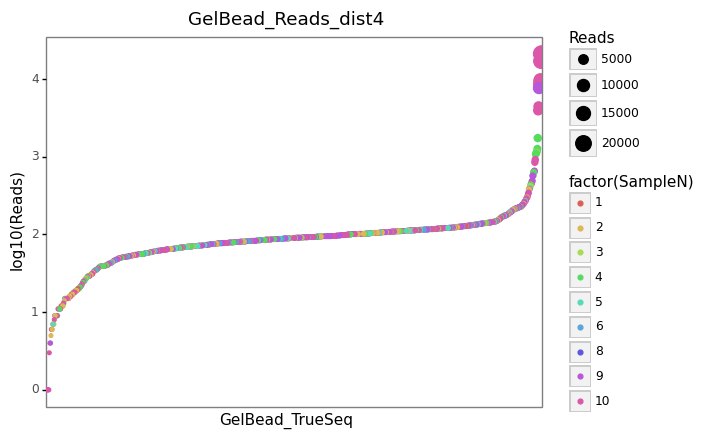

<ggplot: (8757121005743)>

In [5]:
# geom_point. Reorder GelBead_TrueSeq by Reads.
(ggplot(df_gsr_drop, aes(x = 'reorder(GelBead_TrueSeq,Reads)', y = 'log10(Reads)', color = 'factor(SampleN)' ) )
+ geom_point(aes(size = 'Reads'))
+ scale_alpha_continuous(range=(1,100))
+ labs(x='GelBead_TrueSeq', y='log10(Reads)', title = "GelBead_Reads_dist4")
+ theme_bw()
+ theme(panel_grid=element_blank(), axis_text_x = element_blank(), axis_ticks_major_x=element_blank())
)